    Tree: A connected acyclic graph, i.e.,a graph in which there are no cycles.Therefore, you cannot have a path that starts and ends at the same nodewithout visiting some intermediate node more than once. 

    An example tree:
    Generic Tree
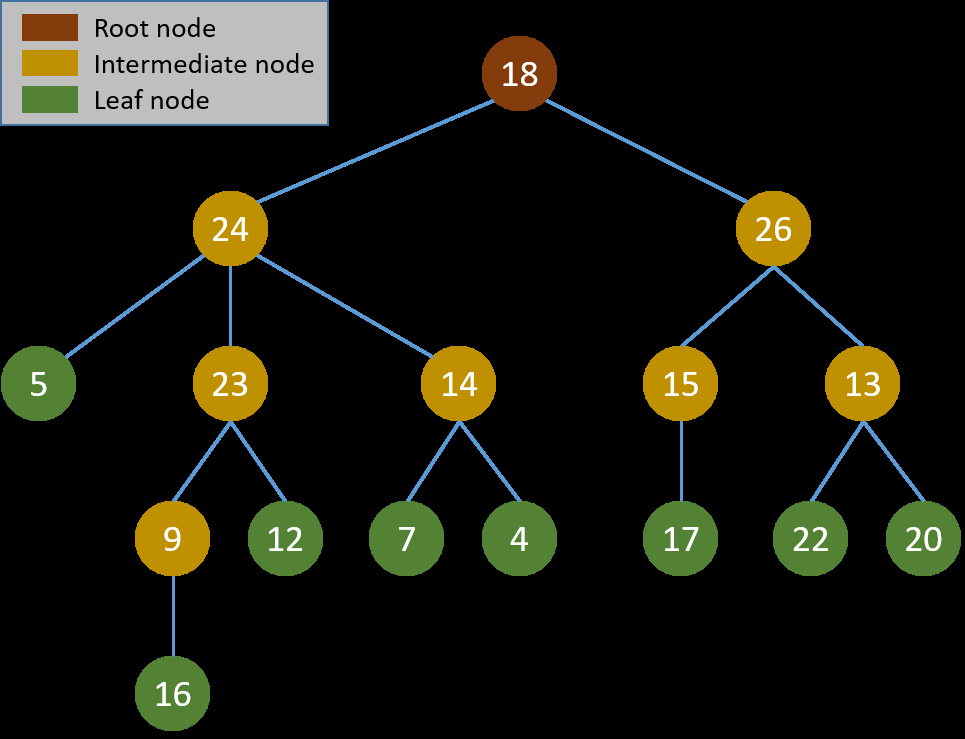

    Some rules and definitions about the trees:
    •Any two vertices must have one and only one path betweenthem. Else, it is not a tree
    •A tree with N  nodes has N−1 edges.
    •Parent (Ancestor): the vertex “above” this vertex
    •Child (Descendent): the vertices “below” this vertex
    •Leaf (Terminal Node): a node that has no children
    •Level: the number of edges between this node and the root
    •Ordered tree: where children’s order is significant
    •Depth of a node: the length of the path from the root tothat node ◦Root has depth 0

    •Height of a node: the length of the longest path from thatnode to a leaf ◦Any leaf has height 0

    •Height of a tree: The length of the longest path from theroot to a leaf

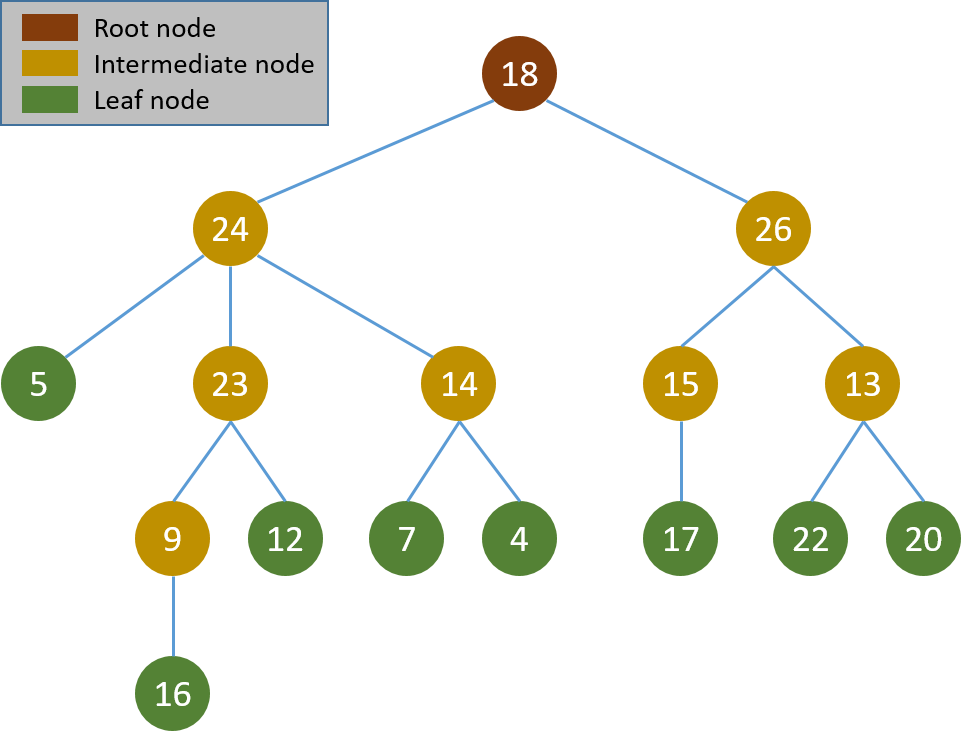

    For the tree above: 
    Root(18) is at level 0 and has depth 0. 
    Root's immediate children (24 and 26) are at Level 1 and have depth 1.
    24 has a height of 3 since it has a path of 3 hops to node 16.
    26 is at the same level with 24, but it has a height of 2since the longest path to a leaf has 2 hops.
    The tree itself has a height 4 since the longest pathfrom the root to any leaf has 4 hops.

In [4]:
//TreeNode definition with linked list
class TreeNode
{
    Object element;
    //linked list of the childs
    TreeNode firstChild;
    TreeNode nextSibling;
}


//TreeNode definition with hashMap
class TreeNode 
{
    Object Element; 
    
    HashMap<Integer, TreeNode> childs; 
}

### Binary Tree

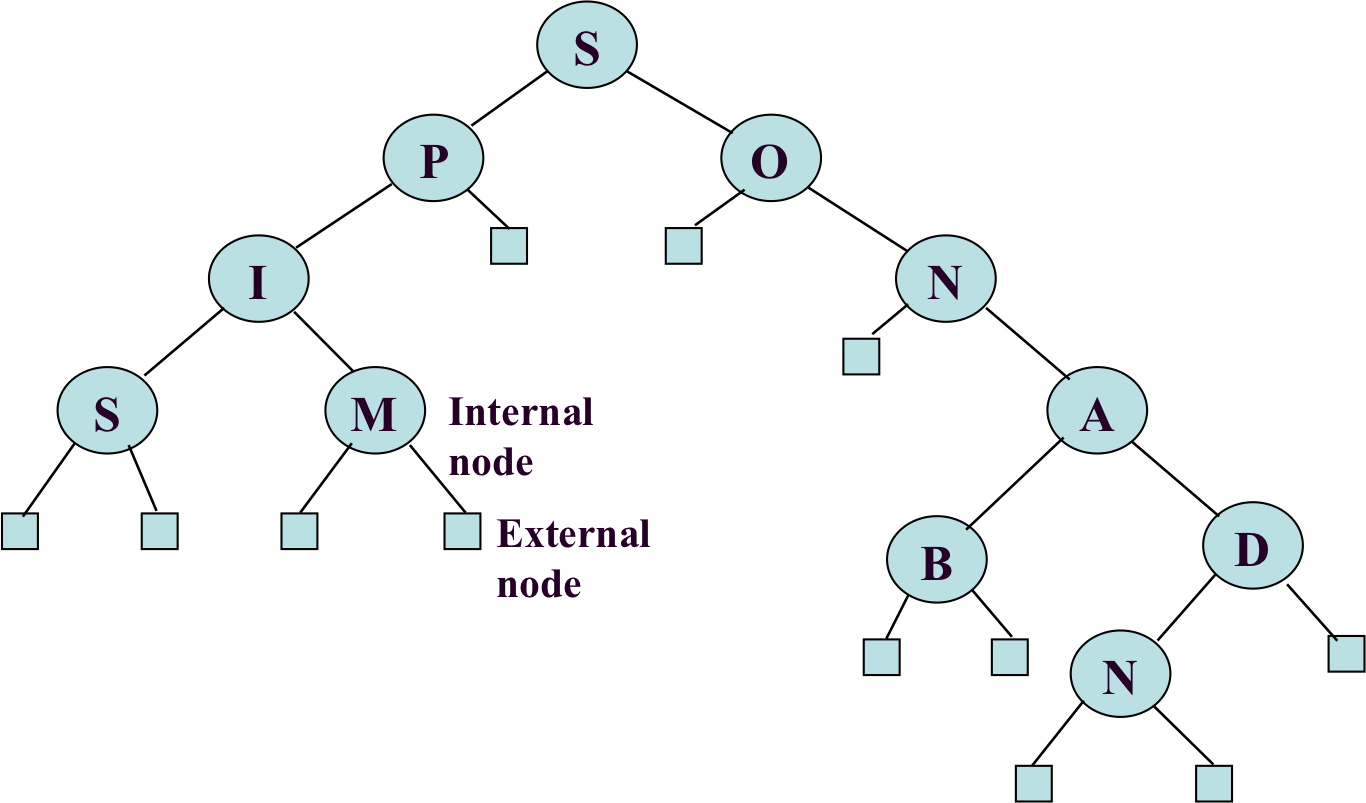

    In a binary tree at each level the number of the nodes is doubled. 
        N(number of nodes) = 1 + 2 + 2^2 .... + 2^(M-1) = 2^M - 1      (M -> number of levels)
        
        M = log(N + 1) 
        

In [ ]:
//Binary tree representation
class BinaryNode
{
    int Element;   // the data in the node
    BinaryNode left;  // Left child
    BinaryNode right; // Right child
    
    public BinaryNode(int Element){
        this.Element = Element; 
    }
}


    Tree Traversal
    
    Preorder traversal : Process order is Root -> Left -> Right
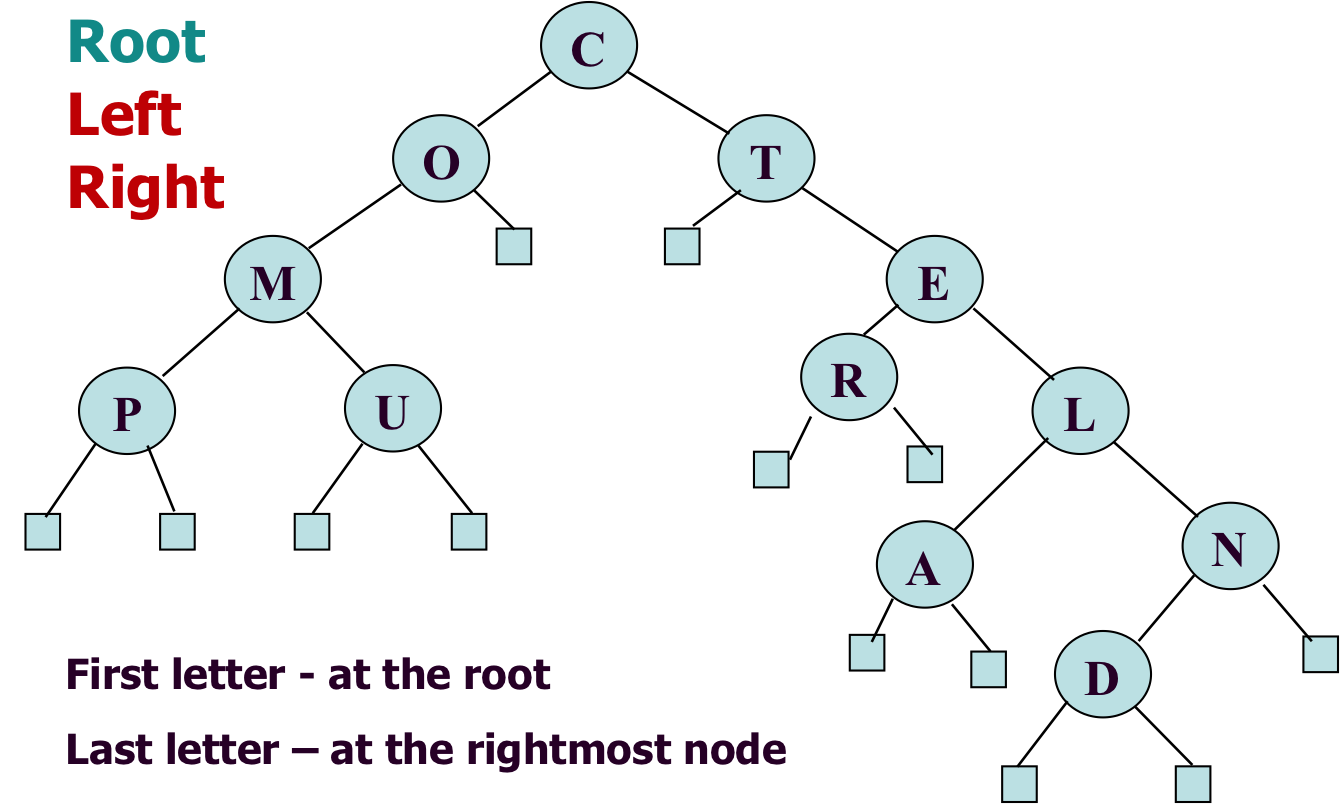

    Psuedo code of preorder traversal

    preorderVisit(current) {
        if (current != null) {
            process(current);
            preorderVisit(left_tree);
            preorderVisit(right_tree);
        }
    }

In [8]:
//Recursion ile preorder Traversal
public void preorderTraversal(BinaryNode curr){
    if(curr != null) {
        process(current); 
        
        preorderTraversal(curr.left); 
        preorderTraversal(curr.right); 
    }
    
}

//Stack ile preorder traversal
public void preorderTraversal(BinaryNode root) {
    Stack<BinaryNode> stack = new Stack<>();
    
    stack.push(root); 
    
    while( !stack.isEmpty() ){
        BinaryNode curr = stack.pop(); 
        
        process(curr); 
        
        if(curr.right != null) {
            stack.push(curr.right); 
        }
        
        if (curr.left != null) {
            stack.push(curr.left); 
        }
    }
}


    Inorder traversal : Process order is Left -> Root -> Right
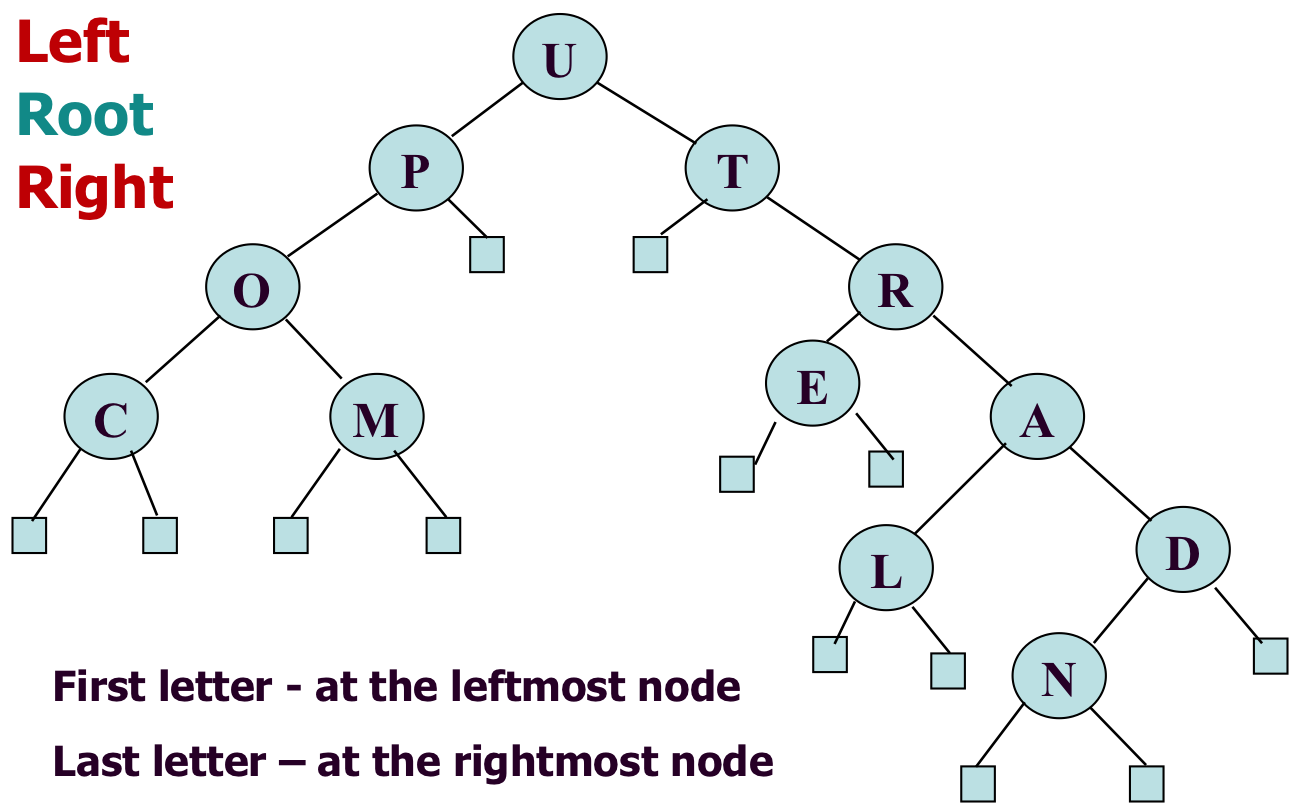    

    Psuedo code of inorder traversal 
    
    inorderVisit(current) {
        if (current != null) {
            inorderVisit(left_tree);
            process(current);
            inorderVisit(right_tree);
        }
    }


In [ ]:
//Recursion ile inorder Traversal
public void inorderTraversal(BinaryNode curr){
    if(curr != null) {
        inorderTraversal(curr.left); 
        process(current); 
        inorderTraversal(curr.right); 
    }
    
}

//Stack ile inorder traversal
public void inorderTraversal2(BinaryNode root) {
    Stack<BinaryNode> stack = new Stack<>();
    
    stack.push(root); 

    BinaryNode curr = root; 
    
    while( !stack.empty() && curr != null ){
        
        //if the current node exists, push it into the stack and move to its left child.
        if(curr != null) {
            stack.push(curr); 
            curr = curr.left; 
        }
        //otherwise if the current node is null, pop an element from stack, process it and move to its right child. 
        else{
            curr = stack.pop();
            process(curr); 
            
            curr = curr.right; 
        }

    }
}


public void process(BinaryNode node) {
    System.out.println(node.Element); 
}

BinaryNode root = new BinaryNode(1);
root.left = new BinaryNode(2);
root.right = new BinaryNode(3);
root.left.left = new BinaryNode(4);
root.right.left = new BinaryNode(5);
root.right.right = new BinaryNode(6);
root.right.left.left = new BinaryNode(7);
root.right.left.right = new BinaryNode(8);

inorderTraversal2(root); 

    Postorder traversal : Process order is Left -> Right -> Root
    
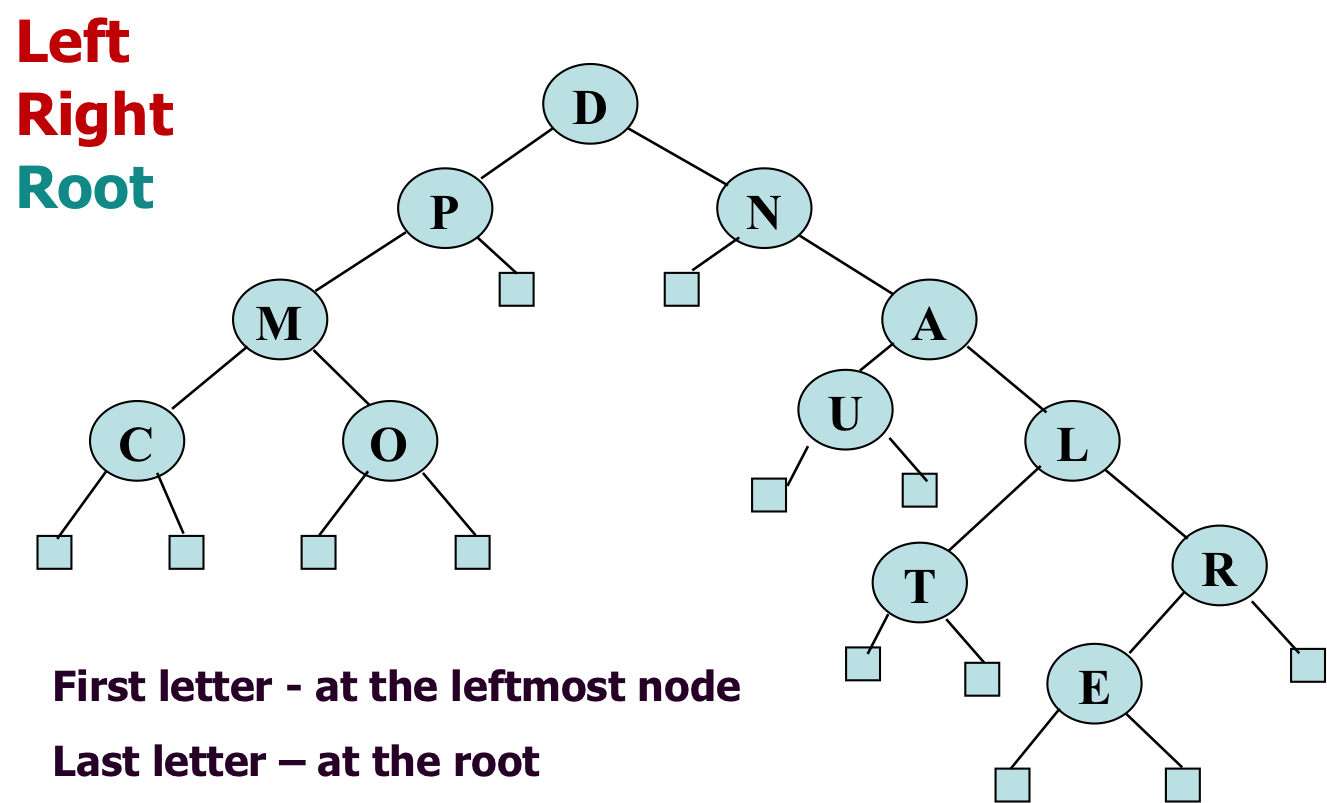
    
    postorderVisit(current) {
        if (current != null) {
            postorderVisit(left_tree);
            postorderVisit(right_tree);
            process(current);
        }
    }

In [ ]:
//Recursion ile postorder Traversal
public void postorderTraversal(BinaryNode curr){
    if(curr != null) {
        postorderTraversal(curr.left); 
        postorderTraversal(curr.right); 
        process(current); 
    }
    
}

//Stack ile postorder traversal
public void postorderTraversal(BinaryNode root) {
    Stack<BinaryNode> stack = new Stack<>();
    
    stack.push(root); 
    
    Stack<Integer> out = new Stack(); 
    
    while( !stack.empty() ){
        BinaryNode curr = stack.pop(); 
        out.push(curr.Element); 
        
        if (curr.left != null) {
            stack.push(curr.left); 
        }
        else if (curr.right != null) {
            stack.push(curr.right); 
        }
    }
    
    while (!out.empyt() ) {
        process(out.pop()); 
    }
}

### Expression Trees

    The stack contains references to tree nodes (bottom is to the left).
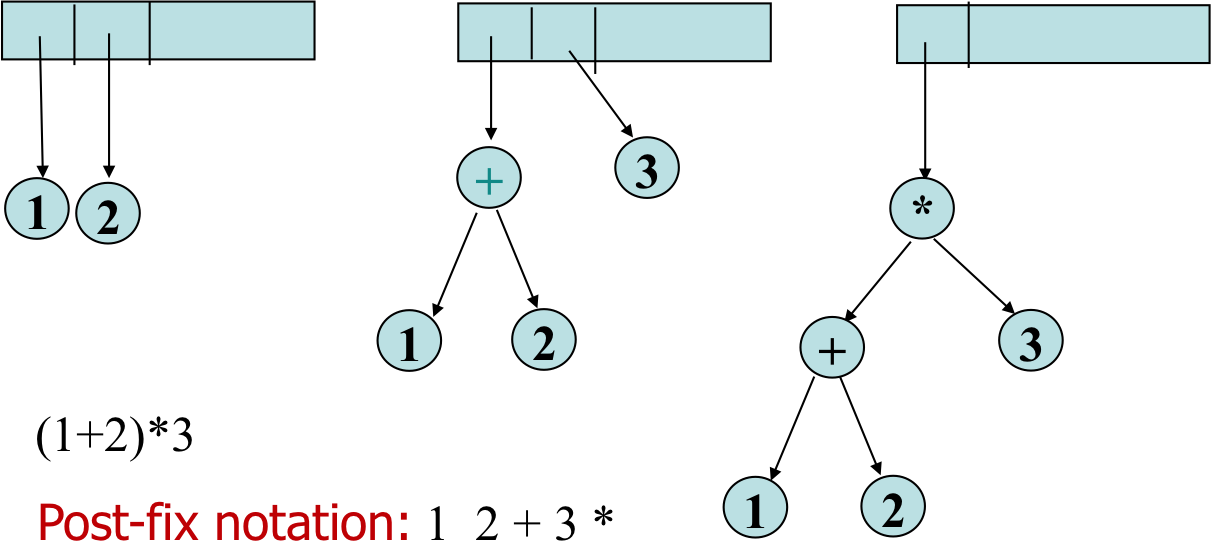

    In-order traversal: 
        (1 + 2) * 3
    
    Post-order traversal: 
        1 2 + 3 *

In [1]:
public static StringBuilder infixToPostfix(String input) {
    List<String> tokenList = convertToTokens(input); 
    System.out.println(tokenList); 

    Stack<String> stack = new Stack<>(); 

    StringBuilder output = new StringBuilder(); 

    for(String token : tokenList) {
        if(token.equals("+") || token.equals("-") ) {
            processOperator(output, stack, token, 1); 
        }
        else if (token.equals("*") || token.equals("/") ) {
            processOperator(output, stack, token, 2); 
        }
        else if ( token.equals("(") ) {
            stack.push(token); 
        }
        else if ( token.equals(")") ) {
            processParanthesis(output, stack); 
        }
        else{
            output.append(" " + token); 
        }
    }

    while( !stack.isEmpty() ) {
        output.append(" " + stack.pop() ); 
    }

    return output; 
}

public static List<String> convertToTokens(String input) {

    StringTokenizer st = new StringTokenizer(input, "+-/*()", true); 

    List<String> tokenList = new ArrayList<>();  
    while( st.hasMoreTokens() ){
        tokenList.add(st.nextToken()); 
    }

    return tokenList; 
}

public static void processOperator(StringBuilder output, Stack<String> stack, String op, int precedence1) {
    while( !stack.isEmpty() ) {
        String opAtTop = stack.pop(); 

        if( opAtTop.equals("(") ) {
            stack.push(opAtTop); 
            break; 
        }
        else {
            int precedence2 = 0; 

            if( opAtTop.equals("+") || opAtTop.equals("-") ) {
                precedence2 = 1; 
            }
            else if(opAtTop.equals("*") || opAtTop.equals("/") ) {
                precedence2 = 2; 
            }

            if(precedence2 < precedence1) {
                stack.push(opAtTop); 
                break; 
            }
            else {
                output.append(" " + opAtTop); 
            }
        }
    }
    stack.push(op); 
}

public static void processParanthesis(StringBuilder output, Stack<String> stack) {
    while( !stack.isEmpty() ) {
        String match = stack.pop(); 
        if( match.equals("(") ) {
            break; 
        }
        else{
            output.append(" " + match); 
        }
    }
}

System.out.println( infixToPostfix("10 + (15 + 3) * 8") );

[10 , +,  , (, 15 , +,  3, ),  , *,  8]
 10    15   3 +    8 * +


    Dfs -> Try to go as deep as possible by visiting the left children. If you reach the end, take one step back and repeat.
    
    Bfs -> Visit the nodes in the tree level-by-level. Do not go to the next level until all nodes in that level have been visited. (Mostly done by using queue) 

In [ ]:
public ArrayList<Integer> dfsOrder = new ArrayList<>();
public ArrayList<Integer> bfsOrder = new ArrayList<>();


public static void dfsTraversal(MyNode root) {
    if (root == null)
        return;
    dfsOrder.add(root.value);
    
    dfsTraversal(root.left);
    dfsTraversal(root.right);
}

public static void bfsTraversal(MyNode root) {
    LinkedList<MyNode> queue = new LinkedList<MyNode>();
    MyNode p;

    queue.add(root);
    while (! queue.isEmpty()) {
        p = queue.remove();
        bfsOrder.add(p.value);
        if (p.left != null)
            queue.add(p.left);
        if (p.right != null)
            queue.add(p.right);

}